## Problem statement:-
- Extract 3000 reviews for Lionking movie which was released in july 2019 from rotten tomatoes.com
- extract these columns:
-  a. ReviewID
-  b. Reviewer Name
-  c. Review
-  d. Rating
-  e. Date-of-Review
- Label the Review Sentiment(0 for  "positive" and 1 for "negative) based on rating >3 'Positive' else 'Negtive binary class
- Need to develop visualizations to find any rellationship between the features to the Sentiment whether good/bad from the data 

- This particular assessment of reviews helps customers before going a movie,or purchasing and for production house they will know which kind of movies the audience will like how they are percieving the movie  and for online sites they would know how many users are accessing their portal to grow their business and recommending similarly liked movies to the users 


# Approach
- Collected the data from  rotten tomatoes.comsite for lionking movie and read it as a dataframe 
- Extracted necessary columns ReviewId,review_text,date,rating 
- Split the date in to month,day then performed exploratory data analysis on reviews 

In [1]:
#importing necessary libraries 
import requests
import time
import pandas as pd 
from textblob import TextBlob


In [2]:
headers = {
'Referer': 'https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user',
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.108 Safari/537.36',
'X-Requested-With': 'XMLHttpRequest',
}

In [3]:
payload = {
'direction': 'next',
'endCursor': '',
'startCursor': '',
}

In [4]:
url = 'https://www.rottentomatoes.com/napi/movie/9057c2cf-7cab-317f-876f-e50b245ca76e/reviews/user'

In [5]:
s = requests.Session()

## extracting 3000 reviews from url each page has 10 reviews so,for collecting 3000 reviews  300 pages 

In [6]:
user,userid,review_text,createDate,updateDate,rating = [],[],[],[],[],[]
counter = 0
reviews = 0
while counter < 300:
    r =s.get(url, headers=headers, params=payload)
    data = r.json()

    if not data['pageInfo']['hasNextPage']:
        break

    payload['endCursor'] = data['pageInfo']['endCursor']
    payload['startCursor'] = data['pageInfo']['startCursor']

    for x in data['reviews']:
        user.append(x['user']['displayName'])
        userid.append(x['user']['userId'])
        review_text.append(x['review'])
        createDate.append(x['createDate'])
        updateDate.append(x['updateDate'])
        rating.append(x['score'])
        reviews = reviews + 1
        
    time.sleep(5)
    counter = counter + 1

In [7]:
lionking_reviewsdf = pd.DataFrame([user,userid,review_text,createDate,updateDate,rating]).T

In [8]:
lionking_reviewsdf.columns = ['user','userid','review_text','createDate','updateDate','rating']

In [9]:
lionking_reviewsdf.head(5)

,user,userid,review_text,createDate,updateDate,rating
0,None,260187223,It was super good. But the original was better.,2019-10-29T04:07:08.203Z,2019-10-29T04:07:08.203Z,4
1,1ovakynd,7D75E4EC-29BA-48CE-993B-E352D34801C8,Beautiful CG. Gorgeous movie but lacked all th...,2019-10-29T03:20:00.255Z,2019-10-29T03:20:00.255Z,3
2,Railan S,978298295,"CGI impecável. Só. Sem alma, sem coração, sem ...",2019-10-28T19:51:06.970Z,2019-10-28T19:51:06.970Z,2
3,Regina P,969064132,I was told that you probably needed to see thi...,2019-10-28T15:23:41.003Z,2019-10-28T15:23:41.003Z,2.5
4,Larry H,978360100,I enjoyed it and some of the scenes are beauti...,2019-10-28T15:03:37.000Z,2019-10-28T15:03:37.000Z,3


In [10]:
import pandas as pd
lionking_reviewsdf.to_csv("lionking_reviews.csv",index=True)

In [11]:
reviews=pd.read_csv("lionking_reviews.csv")

In [12]:
reviews.head()

,Unnamed: 0,user,userid,review_text,createDate,updateDate,rating
0,0,NaN,260187223,It was super good. But the original was better.,2019-10-29T04:07:08.203Z,2019-10-29T04:07:08.203Z,4.0
1,1,1ovakynd,7D75E4EC-29BA-48CE-993B-E352D34801C8,Beautiful CG. Gorgeous movie but lacked all th...,2019-10-29T03:20:00.255Z,2019-10-29T03:20:00.255Z,3.0
2,2,Railan S,978298295,"CGI impecável. Só. Sem alma, sem coração, sem ...",2019-10-28T19:51:06.970Z,2019-10-28T19:51:06.970Z,2.0
3,3,Regina P,969064132,I was told that you probably needed to see thi...,2019-10-28T15:23:41.003Z,2019-10-28T15:23:41.003Z,2.5
4,4,Larry H,978360100,I enjoyed it and some of the scenes are beauti...,2019-10-28T15:03:37.000Z,2019-10-28T15:03:37.000Z,3.0


In [13]:
reviews.dtypes

Unnamed: 0       int64
user            object
userid          object
review_text     object
createDate      object
updateDate      object
rating         float64
dtype: object

In [14]:
#date has time info too which we dont require extracting only date 

In [15]:
import datetime
reviews['createDate'] = pd.to_datetime(reviews['createDate']).dt.date
reviews['updateDate'] = pd.to_datetime(reviews['updateDate']).dt.date

In [16]:
reviews['createDate'] = pd.to_datetime(reviews['createDate'],format = "%Y/%m/%d")
reviews['updateDate'] = pd.to_datetime(reviews['updateDate'],format = "%Y/%m/%d ")

In [17]:
#creating Sentiment based on rating 
reviews["Sentiment"] = reviews["rating"].apply(lambda x: 'Bad' if x < 3 else 'Good')

In [18]:
reviews.head(3)

,Unnamed: 0,user,userid,review_text,createDate,updateDate,rating,Sentiment
0,0,NaN,260187223,It was super good. But the original was better.,2019-10-29,2019-10-29,4.0,Good
1,1,1ovakynd,7D75E4EC-29BA-48CE-993B-E352D34801C8,Beautiful CG. Gorgeous movie but lacked all th...,2019-10-29,2019-10-29,3.0,Good
2,2,Railan S,978298295,"CGI impecável. Só. Sem alma, sem coração, sem ...",2019-10-28,2019-10-28,2.0,Bad


In [19]:
reviews['Sentiment'] = reviews['Sentiment'].astype('category')

## extracting month, day from date 

In [20]:
reviews['Month'] = reviews['createDate'].dt.month
reviews['Day'] = reviews['createDate'].dt.day
reviews['Day_number'] = reviews['createDate'].dt.dayofweek
reviews['Day_Name'] = reviews['createDate'].dt.weekday_name

In [21]:
reviews.head(2)

,Unnamed: 0,user,userid,review_text,createDate,updateDate,rating,Sentiment,Month,Day,Day_number,Day_Name
0,0,NaN,260187223,It was super good. But the original was better.,2019-10-29,2019-10-29,4.0,Good,10,29,1,Tuesday
1,1,1ovakynd,7D75E4EC-29BA-48CE-993B-E352D34801C8,Beautiful CG. Gorgeous movie but lacked all th...,2019-10-29,2019-10-29,3.0,Good,10,29,1,Tuesday


In [22]:
reviews.isna().sum()# ignore since only username has nulls 

Unnamed: 0       0
user           204
userid           0
review_text      0
createDate       0
updateDate       0
rating           0
Sentiment        0
Month            0
Day              0
Day_number       0
Day_Name         0
dtype: int64

In [23]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,1,'Sentiments Vs Number of Reviews ')

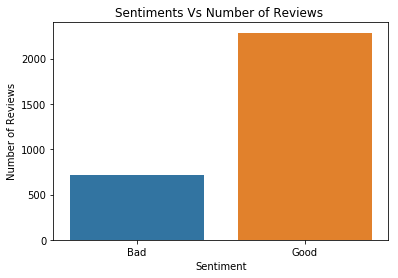

In [24]:
counts= reviews.Sentiment.value_counts()
sns.barplot(x=counts.index,y=counts.values)
plt.xlabel("Sentiment")
plt.ylabel("counts")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.title("Sentiments Vs Number of Reviews ")

##O servation
- 82%of the reviews were with "Good" Sentiment only 18%contain "Bad"

In [25]:
reviews['Sentiment'].value_counts()

Good    2286
Bad      714
Name: Sentiment, dtype: int64

In [55]:
reviews.head()

,Unnamed: 0,user,userid,review_text,createDate,updateDate,rating,Sentiment,Month,Day,Day_number,Day_Name,num_words,avg_words_sent,polarity,review_len,word_count
0,0,NaN,260187223,It was super good. But the original was better.,2019-10-29,2019-10-29,4.0,Good,10,29,1,Tuesday,9,4.333333,0.477083,48,9
1,1,1ovakynd,7D75E4EC-29BA-48CE-993B-E352D34801C8,Beautiful CG. Gorgeous movie but lacked all th...,2019-10-29,2019-10-29,3.0,Good,10,29,1,Tuesday,19,4.842105,0.606250,110,19
2,2,Railan S,978298295,"CGI impecável. Só. Sem alma, sem coração, sem ...",2019-10-28,2019-10-28,2.0,Bad,10,28,0,Monday,65,5.723077,0.000000,438,65
3,3,Regina P,969064132,I was told that you probably needed to see thi...,2019-10-28,2019-10-28,2.5,Bad,10,28,0,Monday,163,4.417178,0.225933,882,163
4,4,Larry H,978360100,I enjoyed it and some of the scenes are beauti...,2019-10-28,2019-10-28,3.0,Good,10,28,0,Monday,10,4.100000,0.675000,50,10


In [26]:
counts= reviews.Sentiment.value_counts()

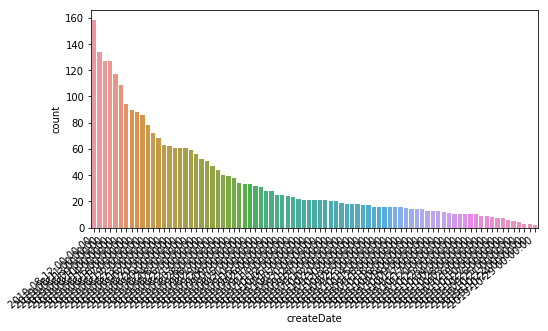

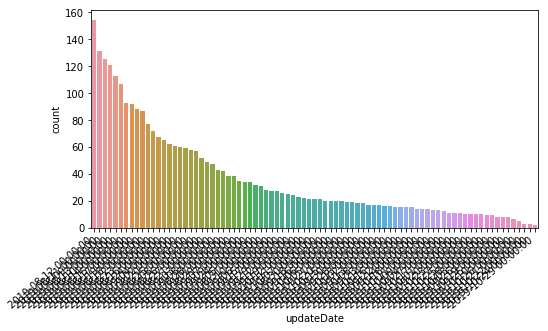

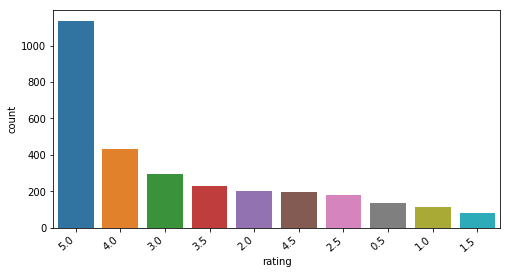

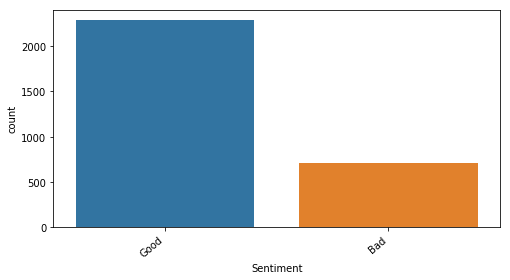

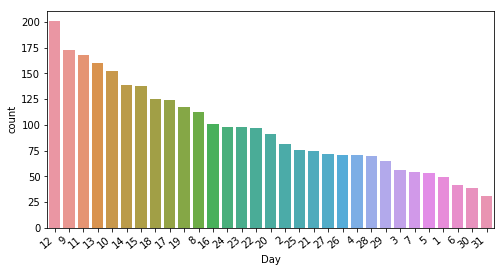

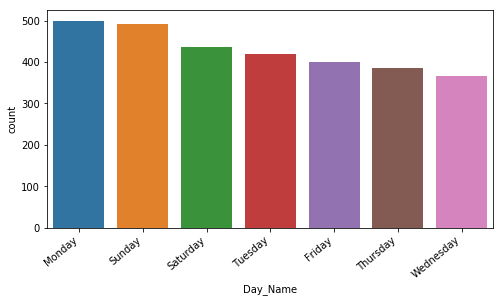

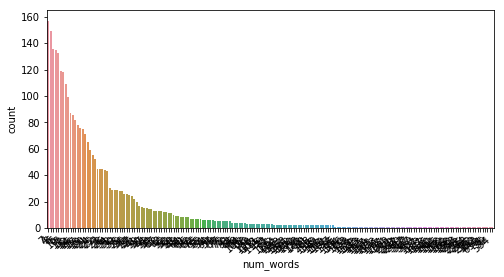

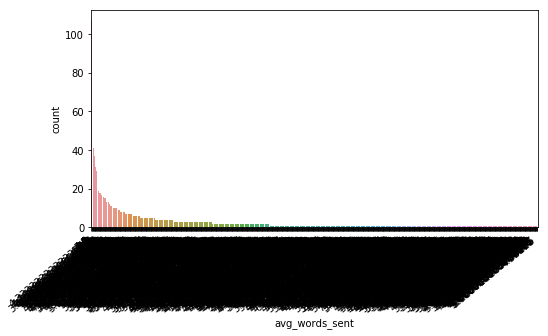

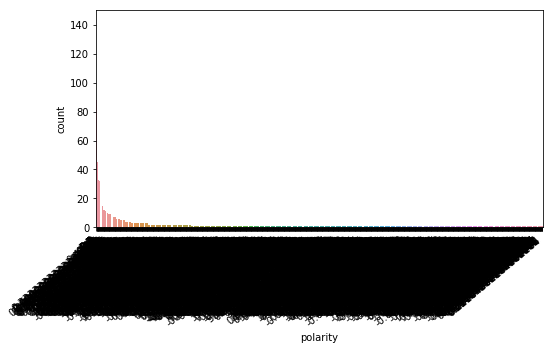

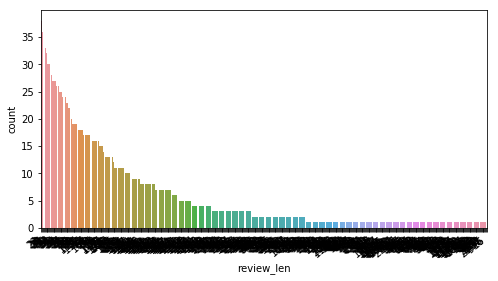

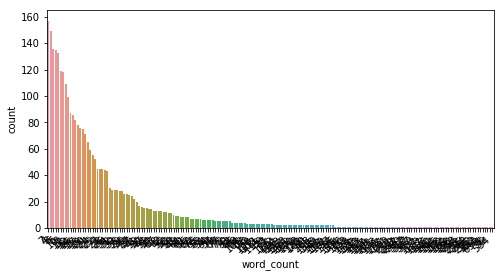

In [57]:
for cols in reviews.drop(["Unnamed: 0","userid","review_text","Month","userid","Day_number","user",], axis=1).columns:
    plt.figure(figsize = (8,4))
    ax = sns.countplot(x= cols, data=reviews, order = reviews[cols].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.show()

# observations 
- Though the movie was released in july19 most of the reviews were in August monthmight be due to summer holidays in August USA. 
- Highest number of reviews in August 5
- less number of reviews on August 29
- Most of the reviews which are written were  updated on the same day  in august month
- In all good reviews most of the rating is '5'
- in all bad Reviews least Review was 1.5
- Most of the reviews are written on 'Monday'

Text(0.5,1,'Number of Reviews in  Month')

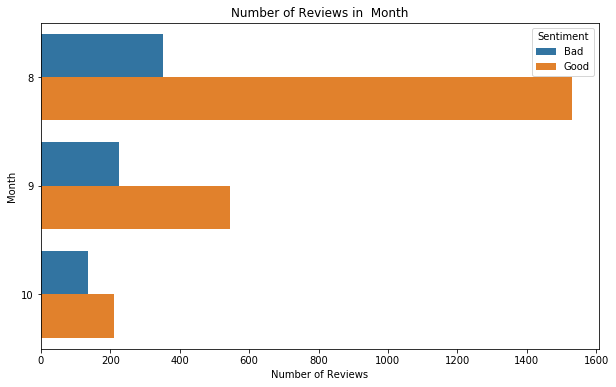

In [28]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y="Month", hue="Sentiment", data=reviews, orient = "h")
ax.set_xlabel('Number of Reviews')
ax.set_title('Number of Reviews in  Month')

Text(0.5,1,'Number of Reviews in each day ')

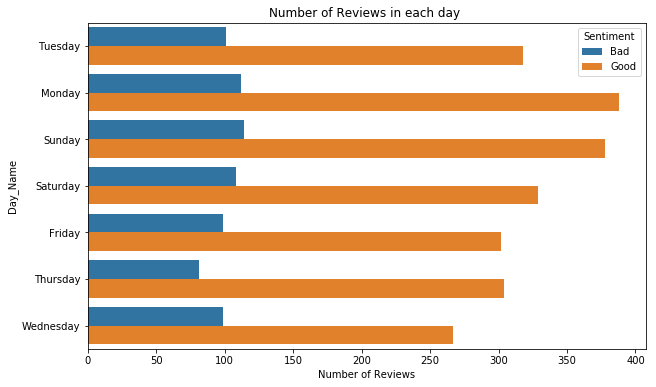

In [29]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y="Day_Name", hue="Sentiment", data=reviews, orient = "h")
ax.set_xlabel('Number of Reviews')
ax.set_title('Number of Reviews in each day ')

- monday and sunday  have high number of reviews compared to rest of the days  
- saturday have  have less number of reviews 

# number of words in reviews 

In [30]:
reviews["num_words"]=reviews['review_text'].str.split().str.len()

In [31]:
reviews[['review_text','Sentiment','num_words']].head()

,review_text,Sentiment,num_words
0,It was super good. But the original was better.,Good,9
1,Beautiful CG. Gorgeous movie but lacked all th...,Good,19
2,"CGI impecável. Só. Sem alma, sem coração, sem ...",Bad,65
3,I was told that you probably needed to see thi...,Bad,163
4,I enjoyed it and some of the scenes are beauti...,Good,10


In [32]:
reviews.groupby('Sentiment').agg({'num_words':["min","median","mean","max","count"]})

num_words                             
                min median       mean  max count
Sentiment                                       
Bad               2     23  41.012605  699   714
Good              1     14  23.587052  773  2286

- in good sentiment min words is 2 and in bad it's 3
- the median number of words in bad is 23,good is 14 

Text(0,0.5,'Number of Reviews')

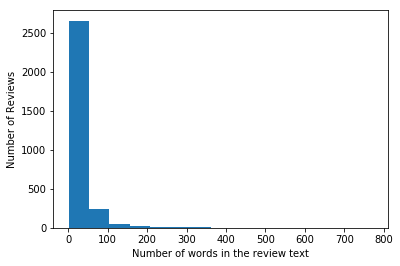

In [33]:
plt.hist(reviews['num_words'], bins=15)
plt.xlabel("Number of words in the review text")
plt.ylabel("Number of Reviews")

- around 2600 reviews contain below 60 words 
- Around 200 reviews have 100 words 
- very few reviews contain 200 to 300 words 

# average word count per sentence to Sentiment

In [34]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_words_sent'] = reviews['review_text'].apply(lambda x: avg_word(x))
reviews[['review_text','avg_words_sent']].head()

,review_text,avg_words_sent
0,It was super good. But the original was better.,4.333333
1,Beautiful CG. Gorgeous movie but lacked all th...,4.842105
2,"CGI impecável. Só. Sem alma, sem coração, sem ...",5.723077
3,I was told that you probably needed to see thi...,4.417178
4,I enjoyed it and some of the scenes are beauti...,4.100000


- per sentence in review text was around 4 to 5 words 

In [35]:
reviews.groupby('Sentiment').agg({'avg_words_sent':["min","median","mean","max","count"]})

avg_words_sent                                
                     min    median      mean   max count
Sentiment                                               
Bad             2.833333  4.617692  4.718011  10.5   714
Good            2.500000  4.558846  4.728943  19.0  2286

- in Bad reviews minimum words used was 2.875 and maximum words 10.5 median 4.6 in all bad reviews  
- in good reviews minimum words used was 2.5 and maximum words 12 good reviews have most of the words 

In [36]:
#reviews which have less than 100 words taken in to reviews_100
reviews_100 = reviews[reviews['num_words']<100]
reviews_100.groupby('Sentiment').agg({'num_words':["min","median","mean","max","count"]})

num_words                            
                min median       mean max count
Sentiment                                      
Bad               2     20  27.845802  99   655
Good              1     14  19.406012  98  2229

Text(0,0.5,'Number of Reviews')

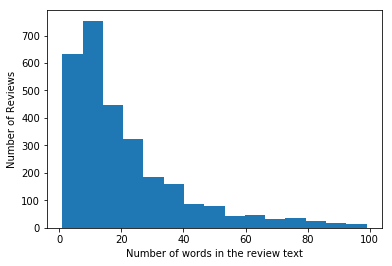

In [37]:
plt.hist(reviews_100['num_words'], bins=15)
plt.xlabel("Number of words in the review text")
plt.ylabel("Number of Reviews")

- from the above plot observed that around 2600 reviews contain below 60 words to check it further how many words per review
- reviews_100 data collected
- around 800 reviews have less than 20words 
- around 500 reviews have less than 30words 
- around 150 review have  less than 40words 
- around 20 to 30 reviews have below 60 and 80 words 
- around 20 reviews only have upto 100 words in their reviews 
- observed that most user swho writes reviews in less words 
- particularly around 10 to 20 users who liked the movie alot and wrote a good review in 100 words 

In [38]:
reviews.head(3)

,Unnamed: 0,user,userid,review_text,createDate,updateDate,rating,Sentiment,Month,Day,Day_number,Day_Name,num_words,avg_words_sent
0,0,NaN,260187223,It was super good. But the original was better.,2019-10-29,2019-10-29,4.0,Good,10,29,1,Tuesday,9,4.333333
1,1,1ovakynd,7D75E4EC-29BA-48CE-993B-E352D34801C8,Beautiful CG. Gorgeous movie but lacked all th...,2019-10-29,2019-10-29,3.0,Good,10,29,1,Tuesday,19,4.842105
2,2,Railan S,978298295,"CGI impecável. Só. Sem alma, sem coração, sem ...",2019-10-28,2019-10-28,2.0,Bad,10,28,0,Monday,65,5.723077


## top 5 highest Positive reviews  

In [39]:
# textblob#library for processing textual data
from textblob import TextBlob# offers features like Sentiment analysis 

## polarity score tells us that the given  English phrase is positive or negative Sentiment.

In [40]:
reviews['polarity'] = reviews['review_text'].map(lambda text: TextBlob(text).sentiment.polarity)
reviews['review_len'] = reviews['review_text'].astype(str).apply(len)
reviews['word_count'] = reviews['review_text'].apply(lambda x: len(str(x).split()))


- to preview whether the sentiment polarity score works
- let's  randomly select 5 reviews with the highest sentiment polarity score
- for ex:-TextBlob("not a very great caliculation").sentiment 
- Sentiment(polarity=-0.3076923076923077, subjectivity=0.5769230769230769)

- subjectivity of about 0.6, meaning it is fairly subjective.
- polarity of about -0.3, meaning it is slightly negative


# top 5 highest positive reviews 

In [41]:
print('5 random reviews with the highest positive sentiment polarity: \n')
cl = reviews.loc[reviews.polarity == 1, ['review_text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the highest positive sentiment polarity: 

This movie is still GREAT! nothing beats being a kid and watching the animated version, but this is absolutely awesome!
Excellent graphics and scenery, the animals were so life like.
awesome a must see!!
People should give more rotten tomatoes!!!!!
I loved everything!!!


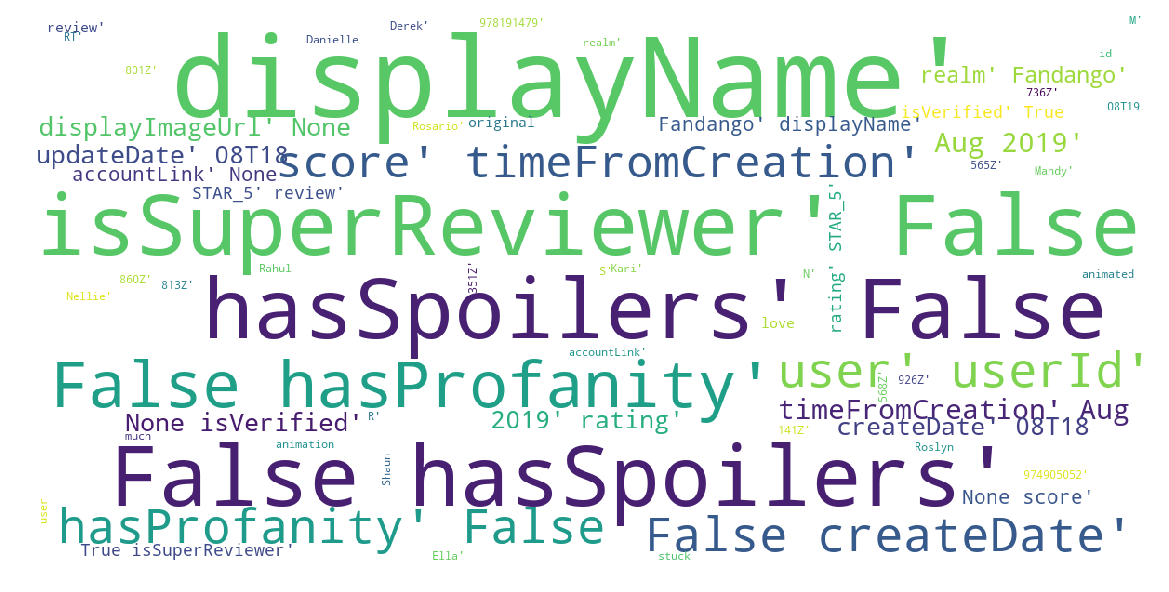

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(reviews, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews["review_text"])

In [43]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
cl =reviews.loc[reviews.polarity == 0, ['review_text']].sample(5).values
for c in cl:
    print(c[0])

5 random reviews with the most neutral sentiment(zero) polarity: 

Its a movie made for kids.
The Lion King .. either version are classics
I didn’t like the casting
i didn't like that they cut some of the songs. i did like the movie itself.
It’s was opening my knowledge of nature!


## preprocessing steps 

In [44]:
import pandas as pd 
data = pd.read_csv("lionking_reviews.csv")

In [45]:
import warnings
warnings.filterwarnings('ignore')

## transform our reviewtext into lower case.This avoids having multiple copies of the same words

In [46]:
data['review_text'] = data['review_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['review_text'].head()

0      it was super good. but the original was better.
1    beautiful cg. gorgeous movie but lacked all th...
2    cgi impecável. só. sem alma, sem coração, sem ...
3    i was told that you probably needed to see thi...
4    i enjoyed it and some of the scenes are beauti...
Name: review_text, dtype: object

## stop words removal  

In [47]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['review_text'] = data['review_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['review_text'].head()


0                         super good. original better.
1    beautiful cg. gorgeous movie lacked humor made...
2    cgi impecável. só. sem alma, sem coração, sem ...
3    told probably needed see film theatre order fu...
4                            enjoyed scenes beautiful.
Name: review_text, dtype: object

## removing punctuation

In [48]:
data['review_text'] = data['review_text'].str.replace('[^\w\s]','')

## stemming 

In [49]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['review_text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                             super good origin better
1    beauti cg gorgeou movi lack humor made origin ...
2    cgi impecável só sem alma sem coração sem cari...
3    told probabl need see film theatr order fulli ...
4                                   enjoy scene beauti
Name: review_text, dtype: object

## lemmetize

In [50]:
from textblob import Word

In [51]:
data['review_text'] = data['review_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['review_text'].head()

0                           super good original better
1    beautiful cg gorgeous movie lacked humor made ...
2    cgi impecável só sem alma sem coração sem cari...
3    told probably needed see film theatre order fu...
4                              enjoyed scene beautiful
Name: review_text, dtype: object